<a href="https://colab.research.google.com/github/Yanbing-Judy/190DD-Project/blob/main/Project_Part1a_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CMPCS 190DD/ PSTAT 197A Project Part 1

Author: Lu Han, Judy Zhu

(a): Initial $S_{v,c}^{(0)}$ probability mass distribution (PMF) as well as initial infected population sizes $\textit{$I_{c}$}$, and model parameters $\textit{$L_{c}$}$ and γ for a single leaf node are given in $\textbf{part1a.npz}$. Choose arbitrary $\beta_{v,c}$ values between in [0,1] such that $\beta_{v,c}$ are non decreasing as v or c increases. In other words, $\beta_{v,0}$ $\leq$ $\beta_{v,1}$ $\leq$ $\beta_{v,2}$ $\leq$ $\beta_{v,3}$ for all v and $\beta_{0,c}$ $\leq$ $\beta_{1,c}$ $\leq$ $\beta_{2,c}$ $\leq$ $\beta_{3,c}$ for all c.

In [1]:
import numpy as np
import pandas as pd

from scipy import integrate
from scipy.integrate import solve_ivp

from itertools import product
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [150]:
part1a = np.load('part1a.npz')

print(part1a.files)

for i in part1a:
    print(i)
    print(part1a[i])
    
N = part1a['N']
Svc_0_pmf = part1a['Svc_0_pmf']
Lc = part1a['Lc']
Ic_0 = part1a['Ic_0']
gamma = part1a['gamma']
# initial conditions
R = np.zeros(1)
R[0] = 0
Svc = np.multiply(Svc_0_pmf, N - np.sum(Ic_0)).flatten()
y0 = np.concatenate((Svc, Ic_0, R)) 
print(Svc.sum(axis=0).sum(axis=0), Ic_0, np.zeros(1))

['N', 'Svc_0_pmf', 'Lc', 'Ic_0', 'gamma']
N
100000.0
Svc_0_pmf
[[0.10953309 0.03300776 0.08179044 0.11593994]
 [0.03089752 0.08511994 0.04528764 0.05718283]
 [0.07471465 0.02495643 0.10236599 0.04256696]
 [0.01605863 0.08109608 0.09158212 0.00789999]]
Lc
[0.3 0.4 0.7 1. ]
Ic_0
[47 90 51 65]
gamma
0.07142857142857142
99746.99999999997 [47 90 51 65] [0.]


1. Using the model dynamics described in the previous section, and all the given and chosen parameters, simulate the behavior of the disease for 120 days for this single leaf node.

In [59]:
#SIR model
def SIR_model(t, Y, beta, gamma):
    #define RHS
    S = Y[:16]
    I = Y[16:20]
    R = Y[20]
    
    dS_dt = -(beta*S*I.sum()/N)
    dI_dt = -dS_dt.reshape(4,4).sum(axis=0)-gamma*I
    dR_dt = gamma*I.sum()
    RHS = np.concatenate((dS_dt, dI_dt, [dR_dt]), axis = 0)
    
    return RHS 

In [105]:
np.random.seed(9)
b = np.random.rand(16).reshape(4,4)
b = np.sort(b, axis = 0)
b = np.sort(b, axis = 1)
b = np.array(b.flatten())
t=np.linspace(0,119,120)

sol = solve_ivp(fun=SIR_model, t_span=(t[0], t[-1]),t_eval=t, y0=y0,\
                dense_output=True, args=[b,gamma])

print(sol.t.shape)
print(sol.t)
print(sol.y.shape)
print(sol.y)

(120,)
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119.]
(21, 120)
[[1.09255974e+04 1.09252692e+04 1.09248423e+04 ... 9.72170674e+03
  9.72138987e+03 9.72109090e+03]
 [3.29242499e+03 3.29205567e+03 3.29157519e+03 ... 2.12881851e+03
  2.12855936e+03 2.12831487e+03]
 [8.15835137e+03 8.15519104e+03 8.15108088e+03 ... 1.80948246e+03
  1.80872178e+03 1.80800432e+03]
 ...
 [5.10000000e+01 9.02607536e+01 1.39577063e+02 ... 9.19347451e+01
  8.6

2. Plot $S_{v,c}$ and $I_{c}$ values over time. (You can plot all $S_{v,c}$ on the same plot. Same for $\textit{$I_{c}$}$.). Also plot the overall $\textit{S, I, R}$ and $\textit{L}$ values.

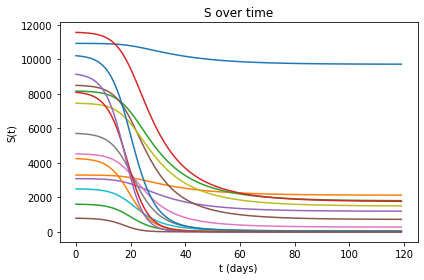

In [155]:
# Svc_over_time
plt.figure()
for i in range (16):
  plt.plot(sol.t, sol.y[i])
plt.ylabel("S(t)")
plt.xlabel("t (days)")
plt.title("S over time")
plt.tight_layout()
plt.show()

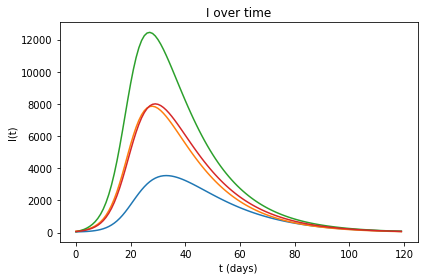

In [90]:
# Ic_over_time
for i in range (16,20):
    plt.plot(sol.t,sol.y[i])
plt.ylabel("I(t)")  
plt.xlabel("t (days)")
plt.title("I over time")
plt.tight_layout()
plt.show()

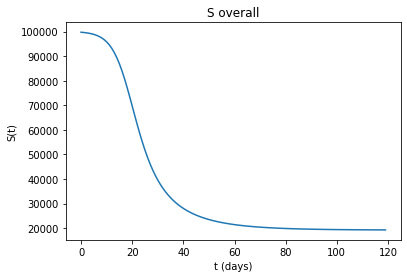

In [146]:
# S_overall
plt.plot(sol.t, sum(sol.y[:16]),label = "S")
plt.ylabel("S(t)")
plt.xlabel("t (days)")
plt.title("S overall")
plt.show()

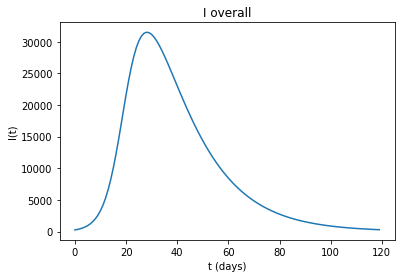

In [147]:
# I_overall
plt.plot(sol.t, sum(sol.y[16:20]),label = "I")
plt.ylabel("I(t)")  
plt.xlabel("t (days)")
plt.title("I overall")
plt.show()

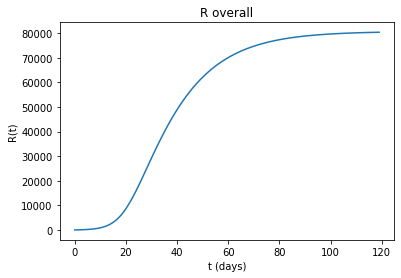

In [148]:
# R_overall
plt.plot(t, sol.y[20])
plt.ylabel("R(t)")  
plt.xlabel("t (days)")
plt.title("R overall")
plt.show()


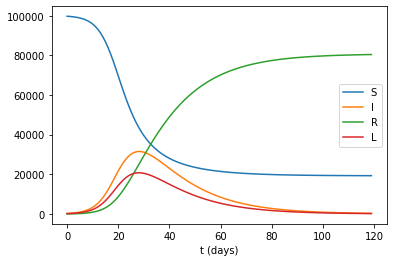

In [153]:
# L_overall
L_overall = Lc * sol.sol(t).T[:,16:20]
Lt = sum(L_overall.T)
Lt

plt.figure()
plt.plot(sol.t, sum(sol.y[:16]),label = "S")
plt.plot(sol.t, sum(sol.y[16:20]),label = "I")
plt.plot(sol.t, sol.y[20],label = "R")
plt.plot(sol.t,Lt, label = "L")
plt.xlabel("t (days)")
plt.legend()
plt.show()

3. Do the shapes of $\textit{S, I, R}$ look similar to what you expected? Which of these plots is the “curve” people refer to when they say “flatten the curve”?


Yes, these shapes of S,I,R look similar to what we expected. The number of suspectible people goes lower, and the number of recovered people goes larger, as time goes. The “I” curve and “L”value curve are the plots when people say “flatten the curve.” 

4. Do you observe that some $S_{v,c}$ compartments converged to zero while others converged to a positive value? Why do you think that is?

Yes. In the first "S over time" graph, some "S" converged to zero, while "S overall" converges to a positive value, around 20000. The convergence is probably because of the spread speed of virus, the exchange number between healthy people and sick people, and social structure. If the virus spreads slow, we can control it in a small range and then have time for recovery. If the sick people takes longer time to recover, then the hospital capacity and other social effects will all influence the speed and the range of being suspected. 

5. Print the percentages of population that never got infected for all compartments (i.e. all values of v and c).

In [165]:
for i in range(16):
  percentage = sol.y[i][119]/Svc[i] *100
  print("Compartment ", i, ": ", percentage, "%")

Compartment  0 :  88.97537203516444 %
Compartment  1 :  64.64277463453382 %
Compartment  2 :  22.161393172819587 %
Compartment  3 :  15.293487198329615 %
Compartment  4 :  38.81093520454252 %
Compartment  5 :  8.537619373110726 %
Compartment  6 :  6.122236653374669 %
Compartment  7 :  0.8995630441865166 %
Compartment  8 :  20.18852038371259 %
Compartment  9 :  2.0456039251581486 %
Compartment  10 :  0.37719283606678394 %
Compartment  11 :  0.15872115477626145 %
Compartment  12 :  0.35217864978514074 %
Compartment  13 :  0.038402654768353056 %
Compartment  14 :  0.005160676951917253 %
Compartment  15 :  0.002310950934057518 %


6. Multiply all the $\beta_{v,c}$ values by 1/4. What happened to the $\textit{S, I, R}$ plots? Did the “curve” flatten compared to the previous case? Print the percentages of population that never got infected with these $\beta_{v,c}$ values.

In [176]:
b_small = np.array(b*0.25).flatten()
sol_s = solve_ivp(fun=SIR_model, t_span=(t[0], t[-1]),t_eval=t, y0=y0,\
                dense_output=True, args=[b_small,gamma])

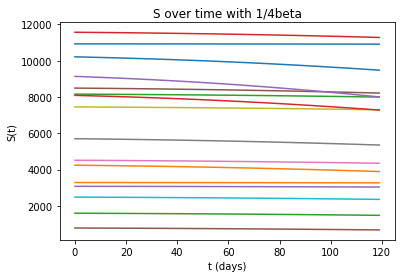

In [172]:
# Svc_over_time with small beta
plt.figure()
for i in range (16):
  plt.plot(sol_s.t, sol_s.y[i])
plt.ylabel("S(t)")
plt.xlabel("t (days)")
plt.title("S over time with 1/4beta")
plt.show()


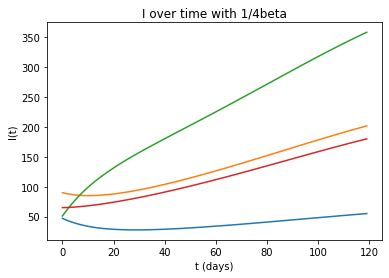

In [173]:
# Ic_over_time
for i in range (16,20):
    plt.plot(sol_s.t,sol_s.y[i])
plt.ylabel("I(t)")  
plt.xlabel("t (days)")
plt.title("I over time with 1/4beta")
plt.show()

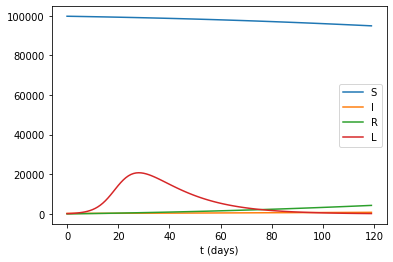

In [178]:
#S+I+R+L
L_overall_s = Lc * sol_s.sol(t).T[:,16:20]
Lt_s = sum(L_overall.T)

plt.figure()
plt.plot(sol_s.t, sum(sol_s.y[:16]),label = "S")
plt.plot(sol_s.t, sum(sol_s.y[16:20]),label = "I")
plt.plot(sol_s.t, sol_s.y[20],label = "R")
plt.plot(sol_s.t, Lt_s, label = "L")
plt.xlabel("t (days)")
plt.legend()
plt.show()

From the graphs and compared with the previous case, we could see that the curves are flattened. The reason is that $\beta$ is the time between contacts. As $\beta$ gets smaller, the curves are flattened. 

In [179]:
print("For 1/4beta, ")
for i in range(16):
  percentage = sol_s.y[i][119]/Svc[i] *100
  print("Compartment ", i, ": ", percentage, "%")

For 1/4beta, 
Compartment  0 :  99.84397204116934 %
Compartment  1 :  99.41846425336752 %
Compartment  2 :  98.00577618432725 %
Compartment  3 :  97.52095956015144 %
Compartment  4 :  98.74272061228339 %
Compartment  5 :  96.76381827477131 %
Compartment  6 :  96.33449575007069 %
Compartment  7 :  93.89499882401773 %
Compartment  8 :  97.8836857163759 %
Compartment  9 :  94.93252559496284 %
Compartment  10 :  92.80934408097322 %
Compartment  11 :  91.74008899533605 %
Compartment  12 :  92.72415118689155 %
Compartment  13 :  90.0118979201917 %
Compartment  14 :  87.61315260178925 %
Compartment  15 :  86.66350619742879 %
